## dir setup

In [1]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [2]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))

In [3]:
# import numpy as np
# from datetime import datetime

In [4]:
import pandas as pd
# pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
# pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# from tqdm import tqdm
# tqdm.pandas()

In [7]:
import sys
sys.path.insert(0, '..')

In [8]:
from src.features import *

In [9]:
fns = os.listdir(cv_dir)
fns

['pred__alpha_val_200__buy_weight_200__factors_128__iterations_10__old_sessions_threshold_1__regularization_0.1.csv',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_15__old_sessions_threshold_3__regularization_0.1.csv',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_15__regularization_0.01.csv',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_10__old_sessions_threshold_5__regularization_0.1.csv',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_15__old_sessions_threshold_7__regularization_0.1.csv',
 '.DS_Store',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_10__regularization_0.1.csv',
 'pred__alpha_val_200__buy_weight_200__factors_768__iterations_15__regularization_0.01.csv',
 'pred__alpha_val_200__buy_weight_100__factors_256__iterations_15__regularization_0.01.csv',
 'pred__alpha_val_200__buy_weight_200__factors_128__iterations_10__old_sessions_threshold_1__regularization_0.01.csv',
 'pred__alpha_val_200__b

In [10]:
fn = 'pred__alpha_val_200__buy_weight_100__factors_512__iterations_15__regularization_0.01.csv'
pred = pd.read_csv(os.path.join(cv_dir, fn), index_col = 0)

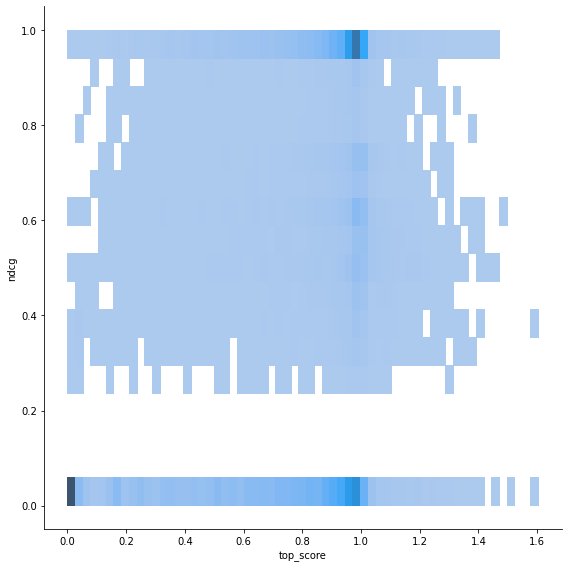

In [11]:
sns.displot(data = pred, x = 'top_score', y = 'ndcg', height = 8, );

<AxesSubplot:xlabel='top_score', ylabel='ndcg'>

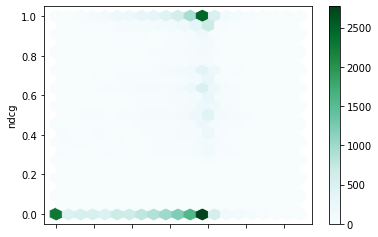

In [12]:
pred.plot.hexbin(x = 'top_score', y = 'ndcg', gridsize = 20)

In [13]:
train_fn = 'train_dataset.pkl'
test_fn = 'test_dataset.pkl'
train, test = read_processed(train_fn, test_fn)

In [14]:
preds_0 = pred[pred.ndcg == 0]

In [15]:
train.event_type = train.event_type.fillna('buy')

In [16]:
train_e = train.groupby('seq').event_type.value_counts().unstack().reset_index()

In [17]:
pred = pd.merge(pred, train_e, how = 'left')

In [63]:
pred['ndcg_cut'] = pd.cut(pred.ndcg, bins = np.arange(0, 1.11, 0.1), right = False)

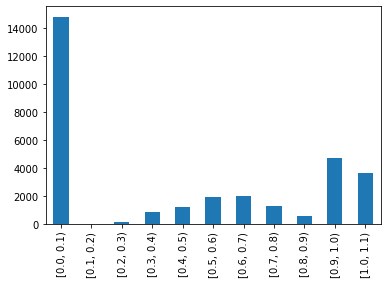

In [64]:
pred.ndcg_cut.value_counts().sort_index().plot(kind = 'bar');

<AxesSubplot:xlabel='ndcg_cut'>

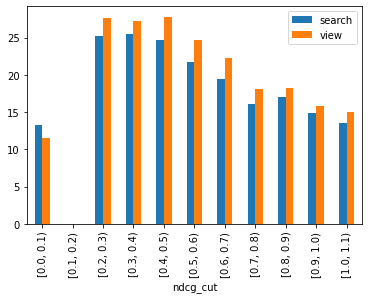

In [65]:
pred.groupby('ndcg_cut')[['search', 'view']].mean().plot(kind = 'bar')

In [66]:
pred['top_score_cut'] = pd.cut(pred.top_score, bins = 10)

<AxesSubplot:xlabel='top_score_cut'>

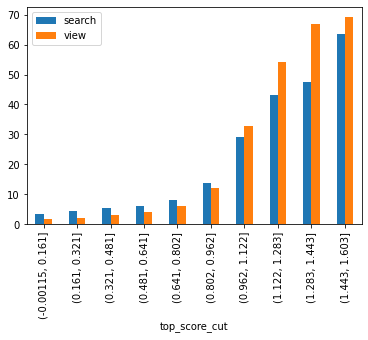

In [67]:
pred.groupby('top_score_cut')[['search', 'view']].mean().plot(kind = 'bar')

In [68]:
pred['top_score_cut'] = pd.cut(pred.top_score, bins = np.arange(0, 2.01, 0.1), right = False)

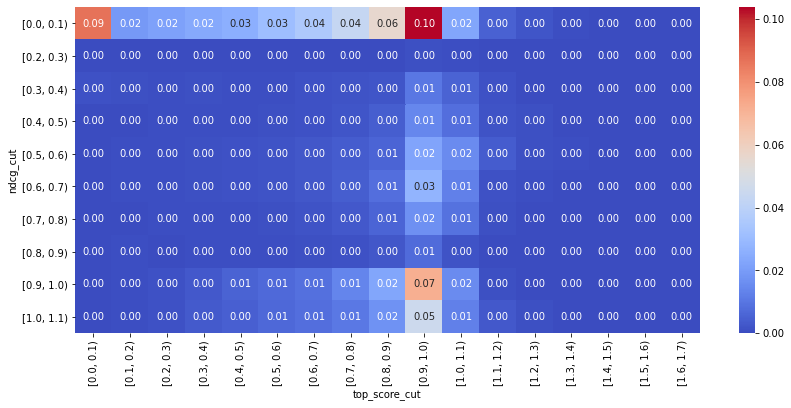

In [69]:
t = pd.crosstab(index = pred.ndcg_cut, columns = pred.top_score_cut)
plt.figure(figsize = (14, 6))
sns.heatmap((t/t.sum().sum()), cmap = 'coolwarm', annot = True, fmt='.2f');

In [71]:
zero_ndcg = pd.Interval(0.0, 0.1, closed = 'left')
zero_topscore = pd.Interval(0.0, 0.1, closed = 'left')

In [97]:
pred['both_zeros'] = (pred.ndcg_cut == zero_ndcg) & (pred.top_score_cut == zero_topscore)
pred['ndcg_zero'] = (pred.ndcg_cut == zero_ndcg) 
pred['topscore_zero'] = (pred.top_score_cut == zero_topscore)

In [73]:
pred.search = pred.search.fillna(0)

(0.0, 100.0)

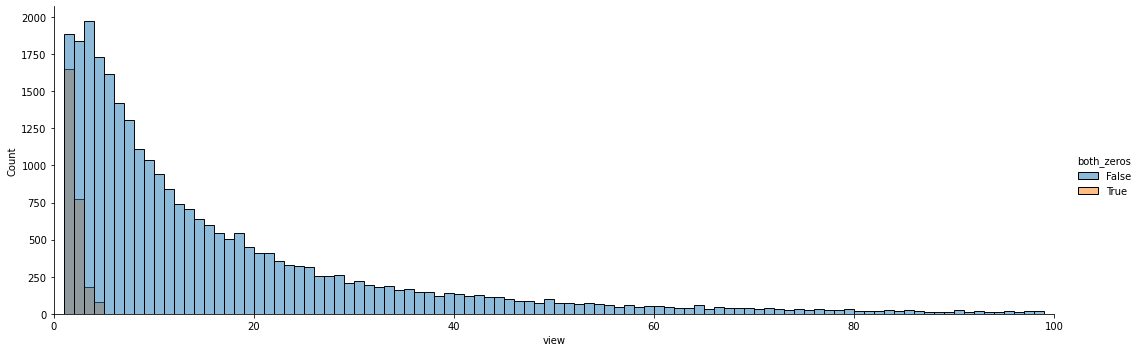

In [74]:
sns.displot(pred, x="view", hue="both_zeros", aspect = 3, bins = range(100))
plt.xlim(0, 100)

(0.0, 100.0)

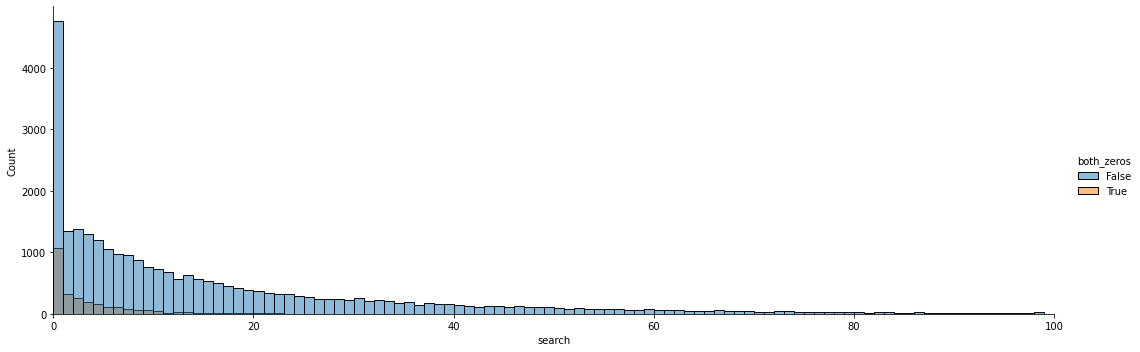

In [75]:
sns.displot(pred, x="search", hue="both_zeros", aspect = 3, bins = range(100))
plt.xlim(0, 100)

In [76]:
pred

,seq,0,1,2,3,4,5,6,7,8,9,top_score,item_bought,item_bought_domain,domain_id_0,domain_id_1,domain_id_2,domain_id_3,domain_id_4,domain_id_5,domain_id_6,domain_id_7,domain_id_8,domain_id_9,rel_item_0,rel_domain_0,rel_item_1,rel_domain_1,rel_item_2,rel_domain_2,rel_item_3,rel_domain_3,rel_item_4,rel_domain_4,rel_item_5,rel_domain_5,rel_item_6,rel_domain_6,rel_item_7,rel_domain_7,rel_item_8,rel_domain_8,rel_item_9,rel_domain_9,relevances_item,relevances_domain,relevances,ndcg,buy,search,view,ndcg_cut,top_score_cut,both_zeros
0,39,401477,1540915,487830,2082872,912792,1809376,1197539,184057,1133897,1289885,0.592515,1499828,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",[1 1 1 1 1 1 1 1 1 1],1.000000,1.0,21.0,3.0,"[1.0, 1.1)","[0.5, 0.6)",False
1,52,599000,732618,1269268,1123676,437697,389552,1699508,331752,165794,988472,0.319673,1596104,MLB-WRISTWATCHES,MLB-PENDRIVES,MLB-BODY_SHAPERS,MLB-CARS_AND_VANS,MLB-MANUAL_MASSAGERS,MLB-FREEZERS,MLB-FLASHLIGHTS,MLB-CELLPHONES,MLB-ENGINE_PISTONS,MLB-CELLPHONES,MLB-TRUCKS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[0 0 0 0 0 0 0 0 0 0],0.000000,1.0,7.0,2.0,"[0.0, 0.1)","[0.3, 0.4)",False
2,57,1496148,1639443,1394484,2057212,856293,2081143,177988,834470,301182,1754441,0.717976,1496148,MLB-WALL_AND_CEILING_LIGHTS,MLB-WALL_AND_CEILING_LIGHTS,MLB-SHOWER_HEADS,MLB-HOME_APPLIANCES_ACCESSORIES_AND_SPARE_PARTS,MLB-POOL_WATERFALLS,MLB-DECORATIVE_TILES_AND_MOSAICS,MLB-LIGHT_BULBS,MLB-LIGHT_BULBS,MLB-LIGHT_BULBS,MLB-LIGHT_BULBS,MLB-POOL_WATERFALLS,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[13 0 0 0 0 0 0 0 0 0],1.000000,1.0,2.0,4.0,"[1.0, 1.1)","[0.7, 0.8)",False
3,71,1569862,1454140,912503,1131975,1039554,329940,1459575,2070069,289641,1868847,0.561069,1428655,MLB-WOMEN_SWIMWEAR,MLB-TACTICAL_VESTS,MLB-SNEAKERS,MLB-BRAS,MLB-STREAMING_MEDIA_DEVICES,MLB-HEADPHONES,MLB-BOOTS_AND_BOOTIES,MLB-TELEVISIONS,MLB-SURVEILLANCE_CAMERAS,MLB-STREAMING_MEDIA_DEVICES,MLB-TACTICAL_VESTS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[0 0 0 0 0 0 0 0 0 0],0.000000,1.0,3.0,1.0,"[0.0, 0.1)","[0.5, 0.6)",False
4,97,1981518,665410,1045740,667018,1296152,2030806,470615,1620065,1297523,2009580,0.894641,1981518,MLM-GAME_CONSOLES,MLM-GAME_CONSOLES,MLM-MICRODERMABRASION_MACHINES,MLM-SUPPLEMENTS,MLM-SEWING_KITS,MLM-TELEPHONES,MLM-TELEPHONES,MLM-TELEPHONES,MLM-TELEPHONES,MLM-TELEPHONES,MLM-RADIO_FREQUENCY_MACHINES,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[13 0 0 0 0 0 0 0 0 0],1.000000,1.0,4.0,11.0,"[1.0, 1.1)","[0.8, 0.9)",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30904,413074,1411732,458164,51467,1087850,1869565,987475,817478,1365658,42010,3581,0.913858,1411732,MLB-SMARTWATCHES,MLB-SMARTWATCHES,MLB-WRISTWATCHES,MLB-SMARTWATCHES,MLB-SMARTWATCHES,MLB-SMARTWATCHES,MLB-WATCH_BANDS,MLB-SMARTWATCHES,MLB-SMARTWATCHES,MLB-SMARTWATCHES,MLB-SMARTWATCHES,12,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 1, 1, 1, 0, 1, 1, 1, 1]",[13 0 1 1 1 0 1 1 1 1],0.975112,1.0,12.0,5.0,"[0.9, 1.0)","[0.9, 1.0)",False
30905,413078,191590,1410197,1891472,725317,1540076,2018631,1266670,189418,1587034,450314,0.124434,922390,MLM-CATS_AND_DOGS_FOODS,MLM-TOY_BUILDING_SETS,MLM-ELECTRIC_PRESSURE_WASHERS,MLM-TOY_BUILDING_SETS,MLM-TOY_BUILDING_SET

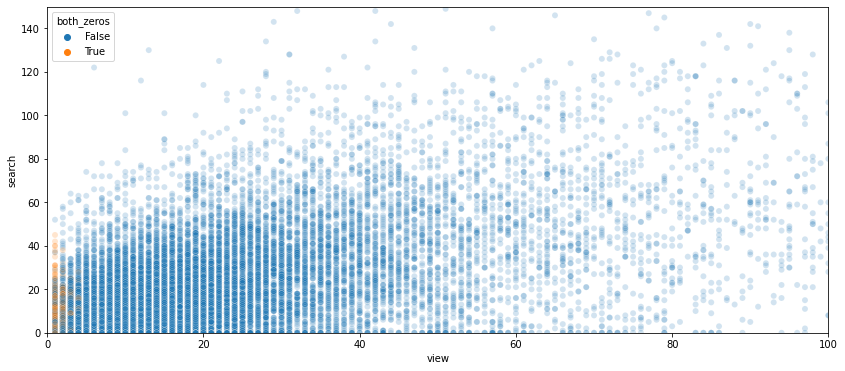

In [83]:
plt.figure(figsize = (14, 6))
plt.xlim(0, 100)
plt.ylim(0, 150)
sns.scatterplot(data=pred, x="view", y="search", hue="both_zeros", alpha = 0.2, );

<Figure size 1008x432 with 0 Axes>

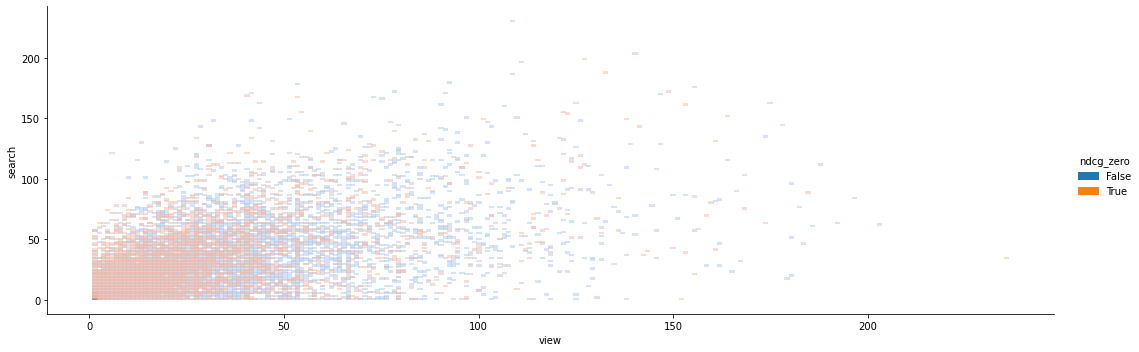

In [116]:
plt.figure(figsize = (14, 6))
# plt.xlim(0, 100)
# plt.ylim(0, 150)
sns.displot(data=pred, x="view", y="search", hue="ndcg_zero", alpha = 0.5, aspect = 3 );

<Figure size 1008x432 with 0 Axes>

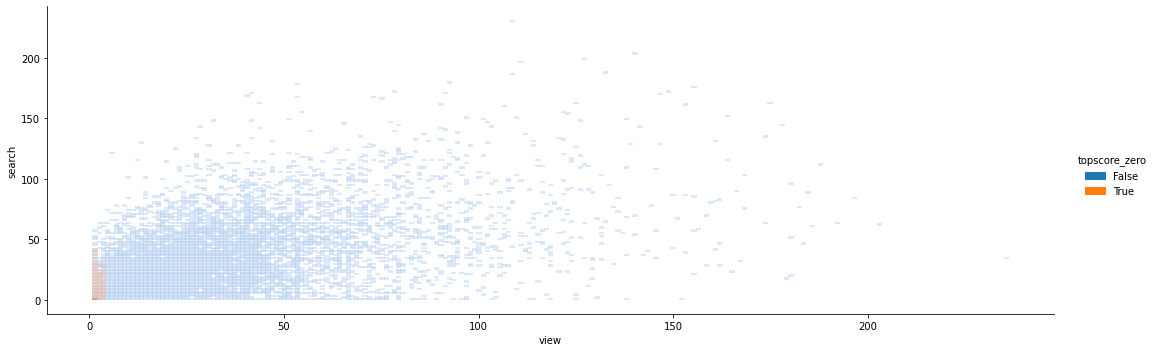

In [119]:
plt.figure(figsize = (14, 6))
# plt.xlim(0, 100)
# plt.ylim(0, 150)
sns.displot(data=pred, x="view", y="search", hue="topscore_zero", alpha = 0.4, aspect = 3);